In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
data = pd.read_csv('ratio_values', header=None, names=['valeur'])


Text(0, 0.5, 'Fréquence')

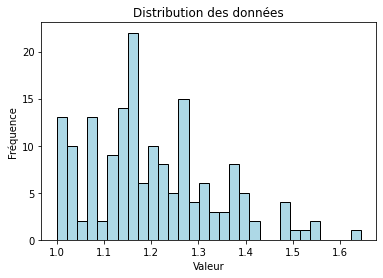

In [ ]:
plt.hist(data['valeur'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution des données')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

Text(0, 0.5, 'Fréquence')

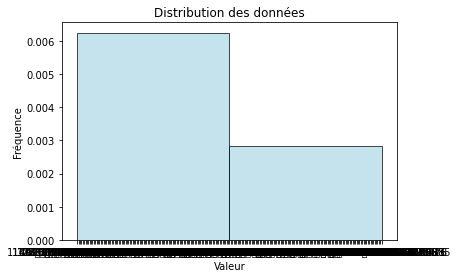

In [52]:
plt.hist(data['valeur'], bins=2, color='lightblue', edgecolor='black', alpha=0.7, density=True)

plt.title('Distribution des données')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

In [2]:
from ete3 import NCBITaxa
import pandas as pd

ncbi = NCBITaxa()

In [18]:
tenta_df = []
with open('ratio_values', 'r+') as reader:
    for line in reader.readlines():
        line = line.strip()
        if line.startswith('>') == True:
            taxid = line.lstrip('>')
            lineage = ncbi.get_lineage(taxid)
            taxonomy = ncbi.get_taxid_translator(lineage)
            species = ncbi.get_taxid_translator([taxid])[int(taxid)]
            superorder = taxonomy[lineage[18]]
        elif line.startswith('<') == True:
            krab = int(line.split('\t')[1])
            ssxrd = int(line.split('\t')[2])
            zf = int(line.split('\t')[3])
        else:
            tenta_df.append([taxid, species, superorder, line, krab, ssxrd, zf])


In [20]:
plot_df = pd.DataFrame(tenta_df, columns=['Taxid', 'Species name', 'Superorder', 'Ratio', 'KRAB', 'SSXRD', 'ZF'])
pd.set_option("display.max_rows", None)
plot_df.to_csv('plotdata.csv', sep=';')

In [21]:
plot_df

,Taxid,Species name,Superorder,Ratio,KRAB,SSXRD,ZF
0,345717,Pieris macdunnoughi,Endopterygota,1.1683168316831682,0,0,1
1,2961670,Neodiprion virginianus,Endopterygota,1.0822281167108752,0,0,1
2,1163346,Diorhabda sublineata,Endopterygota,1.0818181818181818,0,0,1
3,66420,Papilio xuthus,Endopterygota,1.2019230769230769,0,0,1
4,50390,Diabrotica virgifera virgifera,Endopterygota,1.0132596685082873,0,0,1
5,50390,Diabrotica virgifera virgifera,Endopterygota,1.1638418079096047,0,0,1
6,50390,Diabrotica virgifera virgifera,Endopterygota,1.173134328358209,0,0,1
7,1035111,Leguminivora glycinivorella,Endopterygota,1.2525458248472505,0,0,0
8,1035111,Leguminivora glycinivorella,Endopterygota,1.1995637949836422,0,0,0
9,1035111,Leguminivora glycinivorella,Endopterygota,1.1341991341991342,0,0,0


In [42]:
import pandas as pd
import os

In [16]:
os.system("""awk '/^>/ {sub(">", "", $1); print $1}' blastp_summary.txt > taxid.txt""")

0

In [43]:
from ete3 import NCBITaxa
ncbi = NCBITaxa()

with open('taxid.txt') as reader:
    data_list = [elt for elt in reader.readlines()]

# taxid2name = ncbi.get_taxid_translator(data_list)
# print(taxid2name)

tax_data = []
for elt in data_list:
    lineage = ncbi.get_lineage(elt)
    names = ncbi.get_taxid_translator(lineage)
    organism_data = [int(elt.strip())] + [names[taxid] for taxid in lineage]
    tax_data.append(organism_data)
print(tax_data)

taille_max = max(tax_data, key=len)
taille_max_value = len(taille_max)
taille_max_value

columns = ['Taxid'] + [str(i) for i in range(1, taille_max_value)]

[[151549, 'root', 'cellular organisms', 'Eukaryota', 'Opisthokonta', 'Metazoa', 'Eumetazoa', 'Bilateria', 'Protostomia', 'Ecdysozoa', 'Panarthropoda', 'Arthropoda', 'Mandibulata', 'Pancrustacea', 'Hexapoda', 'Insecta', 'Dicondylia', 'Pterygota', 'Neoptera', 'Endopterygota', 'Amphiesmenoptera', 'Lepidoptera', 'Glossata', 'Neolepidoptera', 'Heteroneura', 'Ditrysia', 'Tineoidea', 'Psychidae', 'Oiketicinae', 'Eumeta', 'Eumeta japonica'], [91411, 'root', 'cellular organisms', 'Eukaryota', 'Opisthokonta', 'Metazoa', 'Eumetazoa', 'Bilateria', 'Protostomia', 'Ecdysozoa', 'Panarthropoda', 'Arthropoda', 'Mandibulata', 'Pancrustacea', 'Hexapoda', 'Insecta', 'Dicondylia', 'Pterygota', 'Neoptera', 'Endopterygota', 'Hymenoptera', 'Apocrita', 'Aculeata', 'Vespoidea', 'Vespidae', 'Polistinae', 'Polistini', 'Polistes', 'Polistes canadensis'], [7011, 'root', 'cellular organisms', 'Eukaryota', 'Opisthokonta', 'Metazoa', 'Eumetazoa', 'Bilateria', 'Protostomia', 'Ecdysozoa', 'Panarthropoda', 'Arthropoda', 

In [44]:
sorted_tax = pd.DataFrame(tax_data, columns=columns)
sorted_tax


,Taxid,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,151549,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,...,Tineoidea,Psychidae,Oiketicinae,Eumeta,Eumeta japonica,None,None,None,None,None
1,91411,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,...,Polistini,Polistes,Polistes canadensis,None,None,None,None,None,None,None
2,7011,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,...,Cyrtacanthacridinae,Schistocerca,Schistocerca nitens,None,None,None,None,None,None,None
3,7446,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,...,Vespa,Vespa mandarinia,None,None,None,None,None,None,None,None
4,1265417,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,...,Callichromatini,Aromia,Aromia moschata,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,7048,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,...,Sitophilus,Sitophilus oryzae,None,None,None,None,None,None,None,None
87,7141,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,...,Apoditrysia,Tortricoidea,Tortricidae,Tortricinae,Archipini,Choristoneura,Choristoneura fumiferana,None,None,None
88,334116,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,...,Obtectomera,Papilionoidea,Nymphalidae,Nymphalinae,Nymphalini,Vanessa,Vanessa tameamea,None,None,None
89,116150,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,Ecdysozoa,...,Obtectomera,Papilionoidea,Nymphalidae,Satyrinae,Satyrini,Parargina,Pararge,Pararge aegeria,None,None


In [45]:
sorted_tax = sorted_tax.sort_values(by=columns)
for index, row in sorted_tax.iterrows():
    last_valid_col = row.last_valid_index()
    sorted_tax.at[index, 'Species name'] = sorted_tax.loc[index, last_valid_col]

In [47]:
last_col_name = sorted_tax.columns[-1]
last_col = sorted_tax.pop(last_col_name)

sorted_tax.insert(0, last_col_name, last_col)
sorted_tax

,Species name,Taxid,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,35
52,Diploptera punctata,6984,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Diploptera punctata,None,None,None,None,None,None,None,None,None
56,Gryllus bimaculatus,6999,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Gryllus,Gryllus bimaculatus,None,None,None,None,None,None,None,None
2,Schistocerca nitens,7011,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Cyrtacanthacridinae,Schistocerca,Schistocerca nitens,None,None,None,None,None,None,None
67,Bemisia tabaci,7038,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Bemisia tabaci,None,None,None,None,None,None,None,None,None
86,Sitophilus oryzae,7048,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Sitophilus,Sitophilus oryzae,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Brassicogethes aeneus,1431903,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Brassicogethes,Brassicogethes aeneus,None,None,None,None,None,None,None,None
39,Rhamnusium bicolor,1586634,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Rhagiini,Rhamnusium,Rhamnusium bicolor,None,None,None,None,None,None,None
24,Psylliodes chrysocephala,2598218,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Alticini,Psylliodes,Psylliodes chrysocephala,None,None,None,None,None,None,None
72,Neodiprion fabricii,2872261,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,None,None,None,None,None,None,None,None,None,None


In [48]:
with open('data/resources/organisms_data') as reader:
    dico = {}
    for line in reader.readlines()[1:]:
        taxid = int(line.split('\t')[1])
        assembly = line.split('\t')[2]
        dico[taxid] = assembly

for index, row in sorted_tax.iterrows():
    taxid = row['Taxid']
    sorted_tax.at[index, 'Accession'] = dico[taxid]

sorted_tax

,Species name,Taxid,1,2,3,4,5,6,7,8,...,27,28,29,30,31,32,33,34,35,Accession
52,Diploptera punctata,6984,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,None,None,None,None,None,None,None,None,None,GCA_030220185.1
56,Gryllus bimaculatus,6999,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Gryllus bimaculatus,None,None,None,None,None,None,None,None,GCA_017312745.1
2,Schistocerca nitens,7011,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Schistocerca,Schistocerca nitens,None,None,None,None,None,None,None,GCF_023898315.1
67,Bemisia tabaci,7038,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,None,None,None,None,None,None,None,None,None,GCF_001854935.1
86,Sitophilus oryzae,7048,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Sitophilus oryzae,None,None,None,None,None,None,None,None,GCF_002938485.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Brassicogethes aeneus,1431903,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Brassicogethes aeneus,None,None,None,None,None,None,None,None,GCA_921294245.1
39,Rhamnusium bicolor,1586634,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Rhamnusium,Rhamnusium bicolor,None,None,None,None,None,None,None,GCA_029963845.1
24,Psylliodes chrysocephala,2598218,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,Psylliodes,Psylliodes chrysocephala,None,None,None,None,None,None,None,GCA_927349885.1
72,Neodiprion fabricii,2872261,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,Protostomia,...,None,None,None,None,None,None,None,None,None,GCF_021155785.1


In [49]:
last_col_name = sorted_tax.columns[-1]
last_col = sorted_tax.pop(last_col_name)

sorted_tax.insert(0, last_col_name, last_col)

,Accession,Species name,Taxid,1,2,3,4,5,6,7,...,26,27,28,29,30,31,32,33,34,35
52,GCA_030220185.1,Diploptera punctata,6984,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,...,Diploptera punctata,None,None,None,None,None,None,None,None,None
56,GCA_017312745.1,Gryllus bimaculatus,6999,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,...,Gryllus,Gryllus bimaculatus,None,None,None,None,None,None,None,None
2,GCF_023898315.1,Schistocerca nitens,7011,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,...,Cyrtacanthacridinae,Schistocerca,Schistocerca nitens,None,None,None,None,None,None,None
67,GCF_001854935.1,Bemisia tabaci,7038,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,...,Bemisia tabaci,None,None,None,None,None,None,None,None,None
86,GCF_002938485.1,Sitophilus oryzae,7048,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,...,Sitophilus,Sitophilus oryzae,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,GCA_921294245.1,Brassicogethes aeneus,1431903,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,...,Brassicogethes,Brassicogethes aeneus,None,None,None,None,None,None,None,None
39,GCA_029963845.1,Rhamnusium bicolor,1586634,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,...,Rhagiini,Rhamnusium,Rhamnusium bicolor,None,None,None,None,None,None,None
24,GCA_927349885.1,Psylliodes chrysocephala,2598218,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,...,Alticini,Psylliodes,Psylliodes chrysocephala,None,None,None,None,None,None,None
72,GCF_021155785.1,Neodiprion fabricii,2872261,root,cellular organisms,Eukaryota,Opisthokonta,Metazoa,Eumetazoa,Bilateria,...,None,None,None,None,None,None,None,None,None,None


In [55]:
sorted_tax.to_csv('sorted_taxonomy.csv', sep = ';')

In [73]:
import pandas as pd
import sqlite3
import os

In [74]:
# Chargement des données depuis un fichier CSV
donnees = pd.read_csv("plotdata.csv", sep=";")
donnees = donnees.loc[:, ~donnees.columns.str.contains('^Unnamed')]
taxonomy = pd.read_csv("sorted_taxonomy.csv", sep=";")

In [75]:
for index, row in taxonomy.iterrows():
    last_valid_col = taxonomy.iloc[index].last_valid_index()
    taxonomy.at[index, 'Species_name'] = taxonomy.loc[index, last_valid_col]
taxonomy = taxonomy[['Accession', 'Species_name']]
taxonomy.rename(columns={'Species_name': 'Species_name2'}, inplace=True)


In [76]:
# donnees['total_domains'] = 1 + donnees['KRAB'] 
# donnees = donnees[donnees['total_domains'] == 2]
# donnees = donnees[donnees['Superorder'] == 'Endopterygota']
pd.set_option('display.max_rows', None)
donnees

,Taxid,Species_name,Superorder,Protein ID,Bit score,Ratio,KRAB,SSXRD,ZF
0,151549,Eumeta japonica,Endopterygota,GBP65683.1,107.0,1.171961,0,0,1
1,91411,Polistes canadensis,Endopterygota,XP_014615265.1,42.7,1.154054,0,0,1
2,7011,Schistocerca nitens,Polyneoptera,XP_049794263.1,136.0,1.541950,0,0,1
3,7446,Vespa mandarinia,Endopterygota,XP_035725304.1,43.1,1.152406,0,0,1
4,7446,Vespa mandarinia,Endopterygota,XP_035725305.1,43.1,1.152406,0,0,1
...,...,...,...,...,...,...,...,...,...
165,108931,Nilaparvata lugens,Paraneoptera,XP_039298187.1,82.4,1.265745,0,0,0
166,108931,Nilaparvata lugens,Paraneoptera,XP_039298186.1,82.4,1.265745,0,0,0
167,108931,Nilaparvata lugens,Paraneoptera,XP_039298185.1,82.4,1.265745,0,0,0
168,108931,Nilaparvata lugens,Paraneoptera,XP_039284956.1,40.8,1.020000,0,0,1


In [62]:
conn = sqlite3.connect('fusion.sql') 
taxonomy.to_sql("taxonomy", conn, index=False, if_exists='replace')
donnees.to_sql("result", conn, index=False, if_exists='replace')
query = 'SELECT *\
        FROM taxonomy t INNER JOIN result r ON t.Species_name2 == r.Species_name'

df_fusion = pd.read_sql(query, conn)
df_fusion = df_fusion.drop(['Species_name2'], axis = 1)
df_fusion.to_csv('PRDM9_data.csv', index= False, sep=';')
os.remove('fusion.sql')


In [63]:
df_fusion

,Accession,Taxid,Species_name,Superorder,Protein ID,Bit score,Ratio,KRAB,SSXRD,ZF,total_domains
0,GCA_030220185.1,6984,Diploptera punctata,Polyneoptera,KAJ9577987.1,152.0,1.541582,1,1,1,4
1,GCA_013340265.1,36987,Coptotermes formosanus,Polyneoptera,GFG28833.1,144.0,1.384615,1,1,1,4
2,GCA_018342105.1,63699,Gonioctena quinquepunctata,Endopterygota,KAG5867302.1,64.3,1.091681,1,1,1,4
3,GCF_002891405.2,105785,Cryptotermes secundus,Polyneoptera,XP_023708049.2,139.0,1.421268,1,1,1,4
4,GCF_000697945.3,133901,Frankliniella occidentalis,Paraneoptera,XP_026278850.1,133.0,1.231481,1,1,1,4
5,GCF_000697945.3,133901,Frankliniella occidentalis,Paraneoptera,XP_026278869.2,141.0,1.281818,1,1,1,4
6,GCF_000696155.1,136037,Zootermopsis nevadensis,Polyneoptera,XP_021927980.1,135.0,1.386037,1,1,1,4
7,GCA_944317955.1,146774,Callosobruchus chinensis,Endopterygota,CAH7760754.1,36.2,1.067847,1,1,1,4
8,GCF_012932325.1,161013,Thrips palmi,Paraneoptera,XP_034237838.1,129.0,1.252427,1,1,1,4
9,GCA_947858975.1,380381,Callosobruchus analis,Endopterygota,CAI5839466.1,119.0,1.101852,1,1,1,4
